In [1]:
# Re-load the corrected excel file
import numpy as np
import pandas as pd

file_path_corrected = 'CSA (1).xlsx'
df_corrected = pd.read_excel(file_path_corrected)

# Ensure "Datum melding:" column is in datetime format for the corrected dataframe
df_corrected['Datum melding:'] = pd.to_datetime(df_corrected['Datum melding:'], errors='coerce')

# There seems to have been a misunderstanding in the process. Let's correct the approach.
# Grouping was done correctly, but there was an issue in processing the results. Let's simplify and correct this.

# Re-extract the year and month from the "Datum melding:" column
df_filtered['Year'] = df_filtered['Datum melding:'].dt.year
df_filtered['Month'] = df_filtered['Datum melding:'].dt.month

# Now, correctly group and count the occurrences by year and month
grouped_correctly = df_filtered.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Create a comprehensive DataFrame including all months for the years 2022, 2023, and 2024 and fill missing values with 0
all_months_df = pd.DataFrame([(year, month) for year in [2022, 2023, 2024] for month in range(1, 13)], columns=['Year', 'Month'])
complete_data = pd.merge(all_months_df, grouped_correctly, on=['Year', 'Month'], how='left').fillna(0)

# Correct for February 2024 by adding +4 to its count
complete_data.loc[(complete_data['Year'] == 2024) & (complete_data['Month'] == 2), 'Count'] += 4

# Ensure 'Count' is integer
complete_data['Count'] = complete_data['Count'].astype(int)

# Now, let's proceed to plot
complete_data.head()


NameError: name 'df_filtered' is not defined

In [2]:
import matplotlib.pyplot as plt
import calendar

# Convert 'Month' to month names for better readability in the plot
complete_data['Month Name'] = complete_data['Month'].apply(lambda x: calendar.month_abbr[x])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Colors for each year
colors = {2022: 'blue', 2023: 'green', 2024: 'red'}

# Plot each year's data as dots
for year in complete_data['Year'].unique():
    df_year = complete_data[complete_data['Year'] == year]
    ax.scatter(df_year['Month Name'], df_year['Count'], label=year, color=colors[year])

ax.set_xlabel('Month')
ax.set_ylabel('Number of Missings')
ax.set_title('Monthly Missing Counts by Year')
ax.legend(title='Year')

plt.xticks(rotation=45)  # Rotate month names for better readability
plt.show()


NameError: name 'complete_data' is not defined

In [3]:
from numpy.polynomial.polynomial import Polynomial

# Filter out months after February for 2024
filtered_data = complete_data[~((complete_data['Year'] == 2024) & (complete_data['Month'] > 2))]

# Generate a mapping of month abbreviations to numeric values for plotting purposes
month_to_num = {v: k for k, v in enumerate(calendar.month_abbr[1:], 1)}

# Convert 'Month Name' back to a numeric value for interpolation
filtered_data['Month Num'] = filtered_data['Month Name'].map(month_to_num)


# Define a high-order polynomial degree
poly_degree = 1
# Repeating the plotting process with numpy now imported for linspace

fig, ax = plt.subplots(figsize=(12, 10))

# Plot and interpolate for each year, adjusting for the numpy import
for year, color in colors.items():
    df_year = filtered_data[filtered_data['Year'] == year]
    if year in [2022, 2023]:
        # Fit a polynomial
        p = Polynomial.fit(df_year['Month Num'], df_year['Count'], poly_degree)
        # Generate a smooth line for interpolation
        x_line = np.linspace(df_year['Month Num'].min(), df_year['Month Num'].max(), 200)
        y_line = p(x_line)
        
        # Plot the smooth polynomial line
        #ax.plot(x_line, y_line, color=color, label=f'{year} Trend')
    
    # Scatter plot for actual data points
    ax.plot(df_year['Month Num'], df_year['Count'], color=color)# label=f'Trend {year}'
    ax.scatter(df_year['Month Num'], df_year['Count'], color=color, label=f'{year} Data')

# Adjust x-axis to show month names
ax.set_xticks(range(1, 13))
ax.set_xticklabels(calendar.month_abbr[1:])

ax.set_xlabel('Month')
ax.set_ylabel('Number of Missings')
ax.set_title('Monthly Missing Counts by Year')
ax.legend()

plt.xticks(rotation=45)
plt.show()


NameError: name 'complete_data' is not defined

In [4]:
# Filtering data for visualization of seasonal patterns from April to December
seasonal_data = filtered_data[(filtered_data['Month'] >= 4) & (filtered_data['Month'] <= 12)]

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

for i, year in enumerate([2022, 2023]):
    df_year = seasonal_data[seasonal_data['Year'] == year]
    axs[i].plot(df_year['Month Name'], df_year['Count'], marker='o', linestyle='-', label=f'{year}')
    axs[i].set_title(f'Monthly Missing Counts in {year}')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Number of Missings')
    axs[i].legend()

plt.tight_layout()
plt.show()


NameError: name 'filtered_data' is not defined

In [5]:
# Filtering the data for April to December for both 2022 and 2023
apr_to_dec = filtered_data[(filtered_data['Month'] >= 4) & (filtered_data['Month'] <= 12) & (filtered_data['Year'].isin([2022, 2023]))]

# Separate the data by year
data_2022 = apr_to_dec[apr_to_dec['Year'] == 2022].set_index('Month')['Count']
data_2023 = apr_to_dec[apr_to_dec['Year'] == 2023].set_index('Month')['Count']

# Calculate the correlation between the months in 2022 and 2023
correlation_initial = data_2022.corr(data_2023)

# Adjusting October 2022 value to match October 2023 for the miscount correction
data_2022_corrected = data_2022.copy()
data_2022_corrected.loc[10] = data_2023.loc[10]

# Recalculate the correlation with the corrected October 2022 value
correlation_corrected = data_2022_corrected.corr(data_2023)

correlation_initial, correlation_corrected


NameError: name 'filtered_data' is not defined

In [6]:
# Calculate metrics before correction
mean_diff_initial = data_2022.mean() - data_2023.mean()
std_diff_initial = data_2022.std() - data_2023.std()
max_diff_initial = abs(data_2022 - data_2023).max()

# Calculate metrics after correction (using corrected 2022 data for October)
data_2023_corrected = data_2023.copy()
data_2023_corrected.loc[10] = data_2022_corrected.loc[10]  # Assuming a typo and that the intent was to correct 2022 based on 2023, as before

mean_diff_corrected = data_2022_corrected.mean() - data_2023_corrected.mean()
std_diff_corrected = data_2022_corrected.std() - data_2023_corrected.std()
max_diff_corrected = abs(data_2022_corrected - data_2023_corrected).max()

# Compile metrics into a DataFrame for easy viewing
metrics_df = pd.DataFrame({
    "Metric": ["Mean Difference", "Standard Deviation Difference", "Maximum Difference"],
    "Before Correction": [mean_diff_initial, std_diff_initial, max_diff_initial],
    "After Correction": [mean_diff_corrected, std_diff_corrected, max_diff_corrected]
})

metrics_df


NameError: name 'data_2022' is not defined

In [ ]:
# First, filter the dataframe to include only rows where "Datum terug:" is not null to count instances found back
df_found_back = df_corrected[df_corrected['Datum terug:'].notnull()]

# Count the number of instances found back by month and year
found_back_counts = df_found_back.groupby(df_found_back['Datum terug:'].dt.to_period("M")).size().reset_index(name='Count')
found_back_counts['Datum terug:'] = found_back_counts['Datum terug:'].dt.to_timestamp()  # Convert PeriodIndex back to Timestamp for plotting

# Calculate the average time difference between "Datum melding:" and "Datum terug:"
df_corrected['Time Difference'] = (df_corrected['Datum terug:'] - df_corrected['Datum melding:']).dt.days
average_time_difference = df_corrected.groupby(df_corrected['Datum melding:'].dt.to_period("M"))['Time Difference'].mean().reset_index()
average_time_difference['Datum melding:'] = average_time_difference['Datum melding:'].dt.to_timestamp()  # Convert PeriodIndex back to Timestamp for plotting

# Visualize both the count of instances found back and the average time difference
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plotting the count of instances found back
axs[0].bar(found_back_counts['Datum terug:'], found_back_counts['Count'], color='skyblue')
axs[0].set_title('Count of Instances Found Back by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Plotting the average time difference
axs[1].plot(average_time_difference['Datum melding:'], average_time_difference['Time Difference'], marker='o', linestyle='-', color='orange')
axs[1].set_title('Average Time Difference Between Reported Missing and Found Back')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Average Time Difference (days)')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [7]:
df_corrected['Time Difference'].notnull()


KeyError: 'Time Difference'

In [8]:
# Calculate the percentage of instances found back for each time difference

time_difference_counts = df_corrected['Time Difference'].value_counts().sort_index().reset_index()
time_difference_counts.columns = ['Days', 'Frequency']

time_difference_percentages = time_difference_counts.copy()
time_difference_percentages['Percentage'] = (time_difference_percentages['Frequency'] / time_difference_percentages['Frequency'].sum()) * 100

time_difference_percentages.head()


KeyError: 'Time Difference'

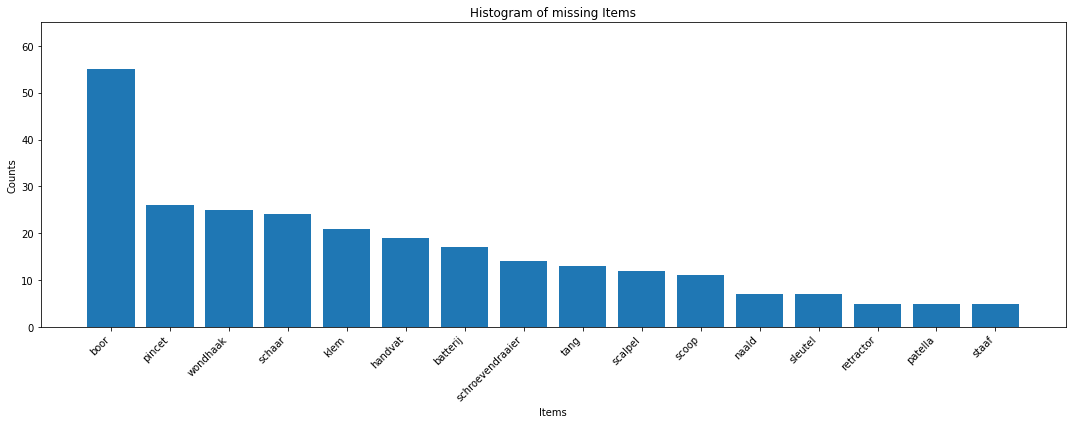

In [11]:
import matplotlib.pyplot as plt

# Provided values
values = {
    "schaar": 24,
    "batterij": 17,
    "scalpel": 12,
    "boor": 55,
    "wondhaak": 25,
    "schroevendraaier": 14,
    "klem": 21,
    "pincet": 26,
    "tang": 13,
    "handvat": 19,
    "retractor": 5,
    "patella": 5,
    "staaf": 5,
    "naald": 7,
    "scoop": 11,
    "sleutel": 7,
    #"overige": 101
}

# Sorting the values by count
sorted_values = sorted(values.items(), key=lambda x: x[1], reverse=True)

# Extracting labels and counts
labels = [item[0] for item in sorted_values]
counts = [item[1] for item in sorted_values]
# Plotting the histogram
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(labels, counts)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Setting limits for y-axis
plt.ylim(0, max(counts) + 10)

# Adding labels and title
plt.xlabel('Items')
plt.ylabel('Counts')
plt.title('Histogram of missing Items')


# Show plot
plt.tight_layout()
plt.show()
